In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir="/content/drive/MyDrive/plates_photoshop/lunapic"

In [ ]:
def check_files(data_dir):
      for cl in os.listdir(data_dir):
        images=len(os.listdir(data_dir+'/'+cl))
        print(f"Number of images in {cl} directory is {images} image.")

In [ ]:
check_files(data_dir)

Number of images in yellow directory is 57 image.
Number of images in orange directory is 83 image.
Number of images in red directory is 68 image.
Number of images in milk tea directory is 56 image.
Number of images in gray directory is 52 image.
Number of images in green directory is 53 image.
Number of images in blue directory is 70 image.


In [ ]:
!mkdir train
!mkdir val

In [ ]:
import random
import shutil

train_percent = 0.8
val_percent = 0.2

# Set the paths for the output train, validation, and test directories
train_dir = "/content/train"
val_dir = "/content/val"

# Loop through each subfolder in the data directory
for subfolder_name in os.listdir(data_dir):
    subfolder_path = os.path.join(data_dir, subfolder_name)

    # Ignore any files in the data directory
    if not os.path.isdir(subfolder_path):
        continue

    # Create the output train, validation, and test subdirectories for this class
    train_subfolder = os.path.join(train_dir, subfolder_name)
    val_subfolder = os.path.join(val_dir, subfolder_name)
    os.makedirs(train_subfolder, exist_ok=True)
    os.makedirs(val_subfolder, exist_ok=True)

    # Get the list of image files in this subfolder
    images = os.listdir(subfolder_path)
    random.shuffle(images)

    # Split the images into train, validation, and test sets
    num_images = len(images)
    num_train = int(num_images * train_percent)

    train_images = images[:num_train]
    val_images = images[num_train:]

    # Copy the image files to the appropriate output directories
    for image in train_images:
        src_path = os.path.join(subfolder_path, image)
        dst_path = os.path.join(train_subfolder, image)
        shutil.copy(src_path, dst_path)

    for image in val_images:
        src_path = os.path.join(subfolder_path, image)
        dst_path = os.path.join(val_subfolder, image)
        shutil.copy(src_path, dst_path)


In [ ]:
check_files(train_dir)

Number of images in yellow directory is 45 image.
Number of images in milk tea directory is 44 image.
Number of images in blue directory is 56 image.
Number of images in red directory is 54 image.
Number of images in gray directory is 41 image.
Number of images in green directory is 42 image.
Number of images in orange directory is 66 image.


In [ ]:
check_files(val_dir)

Number of images in yellow directory is 12 image.
Number of images in milk tea directory is 12 image.
Number of images in blue directory is 14 image.
Number of images in red directory is 14 image.
Number of images in gray directory is 11 image.
Number of images in green directory is 11 image.
Number of images in orange directory is 17 image.


In [ ]:
def create_annotations(image_dir):
    idx=-1
    for sub in os.listdir(image_dir):
        idx+=1
        for filename in os.listdir(image_dir+'/'+sub):
            if filename.endswith('.png'):
                # Get the basename of the image file (without the extension)
                basename = os.path.splitext(filename)[0]
                # Open the corresponding annotation file in write mode
                with open(os.path.join(image_dir+'/'+sub, basename + '.txt'), 'w') as f:
                    # Write the class index to the file in YOLO format
                    f.write(f"{str(idx)} 0.5 0.5 1.0 1.0")


In [ ]:
create_annotations(train_dir)

In [ ]:
create_annotations(val_dir)

In [ ]:
check_files(train_dir)

Number of images in yellow directory is 90 image.
Number of images in milk tea directory is 88 image.
Number of images in blue directory is 112 image.
Number of images in red directory is 108 image.
Number of images in gray directory is 82 image.
Number of images in green directory is 84 image.
Number of images in orange directory is 132 image.


In [ ]:
check_files(val_dir)

Number of images in yellow directory is 24 image.
Number of images in milk tea directory is 24 image.
Number of images in blue directory is 28 image.
Number of images in red directory is 28 image.
Number of images in gray directory is 22 image.
Number of images in green directory is 22 image.
Number of images in orange directory is 34 image.


In [ ]:
yml_classes=os.listdir(train_dir)
yml_classes

['yellow', 'milk tea', 'blue', 'red', 'gray', 'green', 'orange']

# Create the data.yaml file contains the below and upload it :
train: /content/train

val: /content/val

nc: 7

names: yml_classes


In [ ]:
!git clone https://github.com/WongKinYiu/yolov7 # clone repo
%cd yolov7
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov7'...
remote: Enumerating objects: 1139, done.
remote: Total 1139 (delta 0), reused 0 (delta 0), pack-reused 1139
Receiving objects: 100% (1139/1139), 70.41 MiB | 17.62 MiB/s, done.
Resolving deltas: 100% (488/488), done.
/content/yolov7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.5 MB/s eta 0:00:00
/content
Setup complete. Using torch 2.0.0+cu118 (Tesla T4)


In [ ]:
%cd yolov7

/content/yolov7


In [ ]:
os.listdir("/content/yolov7")

['.git',
 'train.py',
 'LICENSE.md',
 'deploy',
 'tools',
 'export.py',
 'README.md',
 'data',
 'models',
 'scripts',
 'figure',
 'cfg',
 'train_aux.py',
 '.gitignore',
 'test.py',
 'requirements.txt',
 'inference',
 'detect.py',
 'paper',
 'hubconf.py',
 'utils']

In [ ]:
import yaml

data = {
    "train": "/content/train",
    "val": "/content/val",
    "nc": 7,
    "names":yml_classes
}

with open("/content/yolov7/data/data.yaml", "w") as f:
    yaml.dump(data, f)


In [ ]:
!wandb disabled
!python train.py --img 224 --batch 16 --epochs 100 --data data.yaml  --weights 'yolov7.pt'

/bin/bash: wandb: command not found
2023-04-26 17:10:39.051838: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 17:10:40.295185: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='yolov7.pt', cfg='', data='./data/data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=100, batch_size=16, img_size=[224, 224], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok=False, qua

In [ ]:
os.listdir('/content/yolov7/runs/train/exp3')

['test_batch2_labels.jpg',
 'train_batch4.jpg',
 'R_curve.png',
 'train_batch3.jpg',
 'results.png',
 'events.out.tfevents.1682529045.4236c9e8a0d3.8824.0',
 'test_batch0_pred.jpg',
 'train_batch5.jpg',
 'weights',
 'opt.yaml',
 'test_batch2_pred.jpg',
 'train_batch2.jpg',
 'hyp.yaml',
 'results.txt',
 'train_batch8.jpg',
 'test_batch1_labels.jpg',
 'test_batch0_labels.jpg',
 'train_batch9.jpg',
 'P_curve.png',
 'confusion_matrix.png',
 'train_batch0.jpg',
 'test_batch1_pred.jpg',
 'train_batch7.jpg',
 'train_batch6.jpg',
 'PR_curve.png',
 'train_batch1.jpg',
 'F1_curve.png']

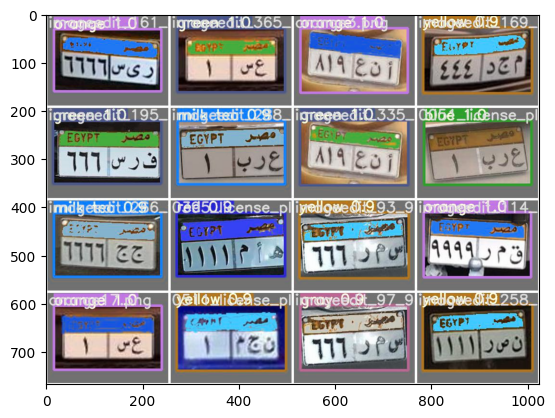

In [ ]:
from matplotlib import pyplot as plt
import cv2 as cv
img = cv.imread('/content/yolov7/runs/train/exp3/test_batch2_pred.jpg')
plt.imshow(img);

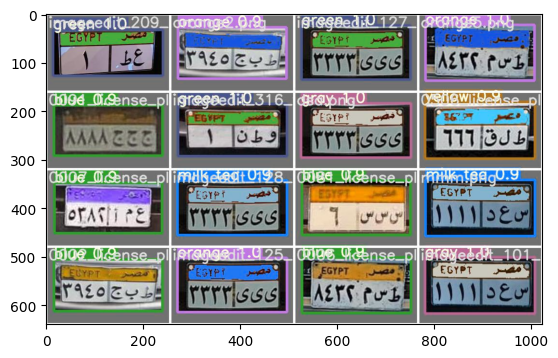

In [ ]:
img = cv.imread('/content/yolov7/runs/train/exp3/test_batch0_pred.jpg')
plt.imshow(img);

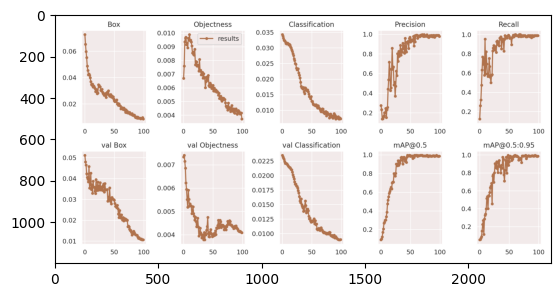

In [ ]:
img = cv.imread('/content/yolov7/runs/train/exp3/results.png')
plt.imshow(img);

In [ ]:
os.listdir("/content/drive/MyDrive/plates_photoshop/test")

['gray', 'orange', 'red', 'green', 'blue', 'yellow', 'milk_tea']

In [ ]:
create_annotations("/content/drive/MyDrive/plates_photoshop/test")

In [ ]:
import yaml

data = {
    "train": "/content/train",
    "val": "/content/drive/MyDrive/plates_photoshop/test",
    "nc": 7,
    "names":os.listdir("/content/drive/MyDrive/plates_photoshop/test")
}

with open("/content/yolov7/data/data_test.yaml", "w") as f:
    yaml.dump(data, f)


In [ ]:
!pip --quiet install onnx onnxruntime onnxsim
!pip install onnx-tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python export.py --weights /content/yolov7/runs/train/exp3/weights/best.pt --grid --end2end --simplify \
--topk-all 100 --iou-thres 0.5 --conf-thres 0.35 --img-size 224 224 --max-wh 224

Import onnx_graphsurgeon failure: No module named 'onnx_graphsurgeon'
Namespace(weights='/content/yolov7/runs/train/exp3/weights/best.pt', img_size=[224, 224], batch_size=1, dynamic=False, dynamic_batch=False, grid=True, end2end=True, max_wh=224, topk_all=100, iou_thres=0.5, conf_thres=0.35, device='cpu', simplify=True, include_nms=False, fp16=False, int8=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.0+cu118 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36512236 parameters, 6194944 gradients, 103.3 GFLOPS

Starting TorchScript export with torch 2.0.0+cu118...
/content/yolov7/models/yolo.py:52: TracerWar

In [ ]:
yml_classes

['yellow', 'milk tea', 'blue', 'red', 'gray', 'green', 'orange']

In [ ]:
# Inference for ONNX model
#Importing necessary libraries.
import cv2
import time
import requests
import random
import numpy as np
import onnxruntime as ort
from PIL import Image
from pathlib import Path
from collections import OrderedDict,namedtuple
import matplotlib.pyplot as plt
cuda = False
w = "/content/yolov7/runs/train/exp3/weights/best.onnx"
#Loading image for testing.
#img = cv2.imread("/kaggle/working/test/Motorcycle/004564_18.jpg")


In [ ]:
#Loading the ONNX inference session.
providers = ['CUDAExecutionProvider', 'CPUExecutionProvider'] if cuda else ['CPUExecutionProvider']
session = ort.InferenceSession(w, providers=providers)


def letterbox(im, new_shape=(224, 224), color=(114, 114, 114), auto=True, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, r, (dw, dh)

#Name of the classes according to class indices.
names = yml_classes

#Creating random colors for bounding box visualization.
colors = {name:[random.randint(0, 255) for _ in range(3)] for i,name in enumerate(names)}

In [ ]:
result={'yellow':0,'milk tea':0,'blue':0,'red':0,'gray':0,'green':0,'orange':0}

In [ ]:
test_path="/content/drive/MyDrive/plates_photoshop/test/"
for clas in yml_classes:
    path=str(test_path+clas+'/')
    for image in os.listdir(path):
        if image.split('.')[-1]=='txt':
            continue
        img = cv2.imread(str(path+image))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #Preprocessing the image for prediction.
        image = img.copy()
        image, ratio, dwdh = letterbox(image, auto=False)
        image = image.transpose((2, 0, 1))
        image = np.expand_dims(image, 0)
        image = np.ascontiguousarray(image)

        im = image.astype(np.float32)
        im /= 255
        im.shape

        #Getting onnx graph input and output names.
        outname = [i.name for i in session.get_outputs()]
        inname = [i.name for i in session.get_inputs()]
        inp = {inname[0]:im}

        # Running inference using session.
        outputs = session.run(outname, inp)[0]


        ori_images = [img.copy()]

        #Visualizing bounding box prediction.
        for i,(batch_id,x0,y0,x1,y1,cls_id,score) in enumerate(outputs):
            image = ori_images[int(batch_id)]
            box = np.array([x0,y0,x1,y1])
            box -= np.array(dwdh*2)
            box /= ratio
            box = box.round().astype(np.int32).tolist()
            cls_id = int(cls_id)
            score = round(float(score),3)
            name = names[cls_id]
            if name==clas:
                result[clas]+=1
            color = colors[name]
            name += ' '+str(score)
    print(f"{clas} = {result[clas]}")

yellow = 13
milk tea = 10
blue = 18
red = 12
gray = 10
green = 11
orange = 13


In [ ]:
check_files(test_path)    # images + annotations

Number of images in gray directory is 22 image.
Number of images in orange directory is 26 image.
Number of images in red directory is 24 image.
Number of images in green directory is 22 image.
Number of images in blue directory is 36 image.
Number of images in yellow directory is 26 image.
Number of images in milk tea directory is 22 image.
Number of images in .ipynb_checkpoints directory is 0 image.


In [ ]:
allResults=0
for cl in result:
    allResults+=result[cl]
allImages=0
for clas in os.listdir(test_path):
    allImages+=len(os.listdir(str(test_path+clas)))/2
print(f"Accuracy = {round(allResults/allImages,2)}")

Accuracy = 0.98


In [ ]:
shutil.copy(w,'/content/drive/MyDrive/photoshopYOLO.onnx')

'/content/drive/MyDrive/photoshopYOLO.onnx'